This notebook contain EDA and analysis of selecting best available feature
- Result : 
    -

## Importing Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import pylab 
%matplotlib inline

In [37]:
df = pd.read_csv("D:\Sanjay\github\Assestments\Instagram-Reach-Prediction\Dataset\instagram_reach.csv")
df.head(2)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23


In [38]:
#df = df.drop("Unnamed: 0", axis=1)
df.head(2)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23


# Checking data

In [39]:
# rows and columns
df.shape

(100, 8)

In [40]:
## column names

In [41]:
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


### observation :  
All features are seems in correct datatype except "Times since posted"
- Need to change its data type

In [43]:
df.describe()

,Unnamed: 0,S.No,Followers,Likes
count,100.000000,100.000000,100.00000,100.00000
mean,8.940000,16.240000,961.96000,46.48000
std,6.639064,7.384286,1014.62567,55.08698
min,0.000000,1.000000,11.00000,8.00000
25%,4.000000,10.750000,252.75000,19.00000
50%,8.000000,16.500000,612.00000,29.00000
75%,12.250000,22.250000,1197.00000,46.00000
max,26.000000,30.000000,4496.00000,349.00000


## Missing Values

In [44]:
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

## there are 6 null values in caption 
- since we cant estimate these missing values 
- so simply goint to impute with a blank string


## Checking and correcting datatype

In [45]:
df.dtypes

Unnamed: 0            int64
S.No                  int64
USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted    object
Likes                 int64
dtype: object

In [46]:
df['Time since posted'].head()

0    11 hours
1     2 hours
2     2 hours
3     3 hours
4     3 hours
Name: Time since posted, dtype: object

In [47]:
df['Time since posted'] = df['Time since posted'].str.replace(" hours","")

In [48]:
df['Time since posted']= df['Time since posted'].astype('int64')

In [49]:
df.dtypes

Unnamed: 0            int64
S.No                  int64
USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted     int64
Likes                 int64
dtype: object

In [50]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


In [51]:
df.dtypes

Unnamed: 0            int64
S.No                  int64
USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted     int64
Likes                 int64
dtype: object

# Creating Extra features

In [52]:
data = df.copy()

In [53]:
type(data)

pandas.core.frame.DataFrame

In [54]:
for index, row in data.iterrows():
    value = row['Hashtags']
    hash_flag = 0
    hashtag = ""
    tag_list = list()
    for i in range(len(value)):
        if value[i]=='#':
            hash_flag = 1
        if hash_flag ==1 and value[i]!='#':
            if value[i].isalnum():
                #print(value[i])
                hashtag = hashtag + value[i]
                if i == len(value)-1:
                    #print(hashtag)
                    tag_list.append(hashtag)
                    
                    hashtag = ""
                    hash_flag = 0
            else:
                #print(hashtag)
                tag_list.append(hashtag)
               
                hashtag = ""
                hash_flag = 0
        #print(tag_list)
        #df.at[index,'Hashtags'] = tag_list
        data.at[index,'Total_hashtags'] = int(len(tag_list))            

In [55]:
data

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,Total_hashtags
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139,5.0
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23,19.0
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25,20.0
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49,20.0
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30,18.0
...,...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3,31,10.0
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3,42,21.0
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3,10,22.0
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3,222,21.0


In [56]:
data['Caption'] = data['Caption'].fillna("")
for index, row in data.iterrows():
    value = row['Caption']
    hash_flag = 0
    hashtag = ""
    tag_list = list()
   
    for i in range(len(str(value))):
#         print(row)
#         print(value[i])
#         print(i)
        if value[i]=='#':
            hash_flag = 1
        if hash_flag ==1 and value[i]!='#':
            if value[i].isalnum():
                #print(value[i])
                hashtag = hashtag + value[i]
                if i == len(value)-1:
                    #print(hashtag)
                    tag_list.append(hashtag)
                    hashtag = ""
                    hash_flag = 0
            else:
                #print(hashtag)
                tag_list.append(hashtag)
                
                hashtag = ""
                hash_flag = 0
        #print(tag_list)
        #df.at[index,'Hashtags'] = tag_list
        data.at[index,'Caption_wordcount'] = int(len(value))
        data.at[index,'Total_Caption_hashtags'] = int(len(tag_list))

In [57]:
data.head(2)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,Total_hashtags,Caption_wordcount,Total_Caption_hashtags
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139,5.0,149.0,6.0
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23,19.0,454.0,20.0


In [58]:
data.isnull().sum()

Unnamed: 0                0
S.No                      0
USERNAME                  0
Caption                   0
Followers                 0
Hashtags                  0
Time since posted         0
Likes                     0
Total_hashtags            0
Caption_wordcount         6
Total_Caption_hashtags    6
dtype: int64

In [59]:
data['Caption_wordcount'] =  data['Caption_wordcount'].fillna(0)
data['Total_Caption_hashtags'] =  data['Total_Caption_hashtags'].fillna(0)

In [60]:
data =data.drop(['S.No','USERNAME',"Caption","Unnamed: 0","Hashtags"], axis=1)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Followers               100 non-null    int64  
 1   Time since posted       100 non-null    int64  
 2   Likes                   100 non-null    int64  
 3   Total_hashtags          100 non-null    float64
 4   Caption_wordcount       100 non-null    float64
 5   Total_Caption_hashtags  100 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 4.8 KB


## Visualization

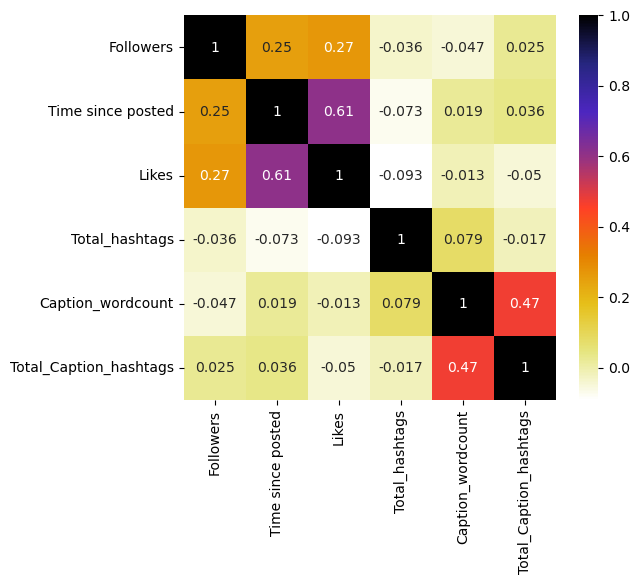

In [62]:
plt.figure(figsize = (6,5))
corr = data.corr()
sns.heatmap(corr, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [63]:
Observation :
    

SyntaxError: invalid syntax (3347255424.py, line 1)

In [ ]:
independent_features = [feature for feature in data.columns if feature != "Likes" and feature!="Time since posted"]
independent_features

C:\Users\sanjay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sanjay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sanjay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

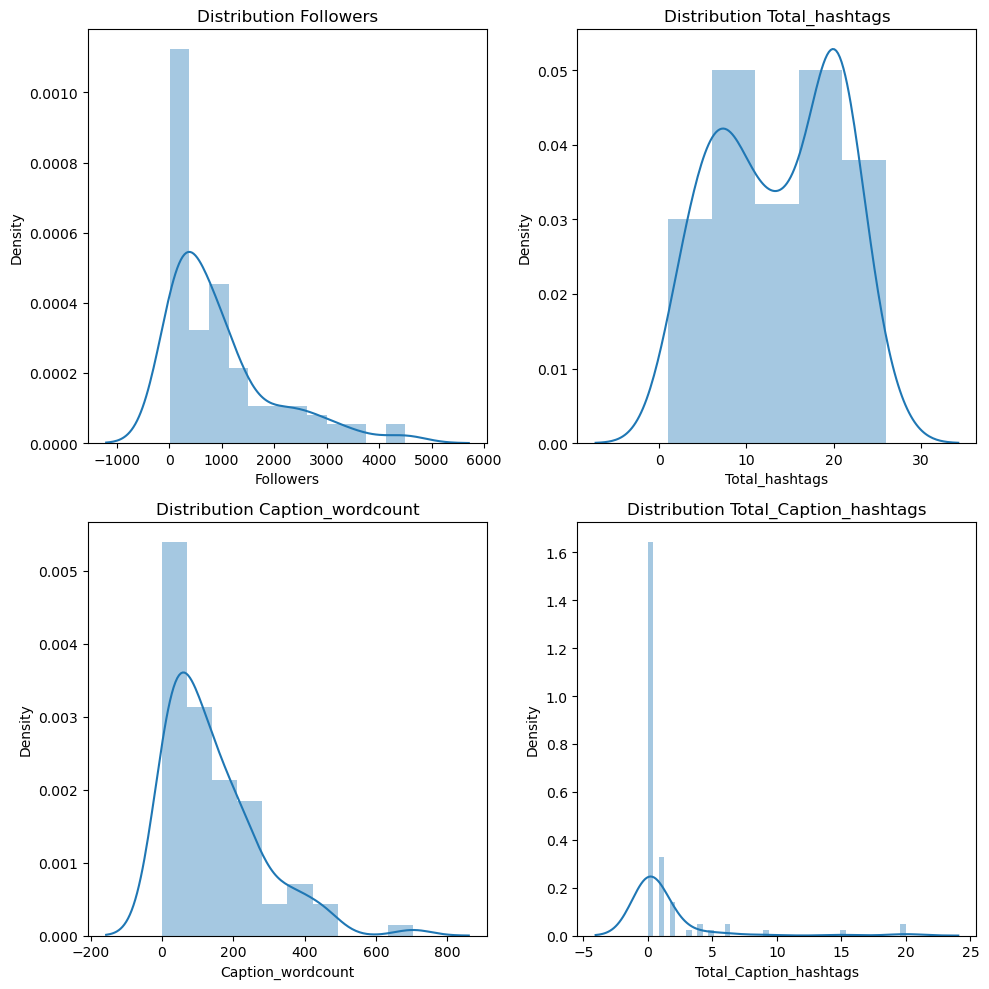

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, feature in enumerate(independent_features):
    sns.distplot(data[feature], ax=axes.flat[i])
    axes.flat[i].set_title(f'Distribution {feature}')

plt.tight_layout()
plt.show()

Followers
Total_hashtags
Caption_wordcount
Total_Caption_hashtags


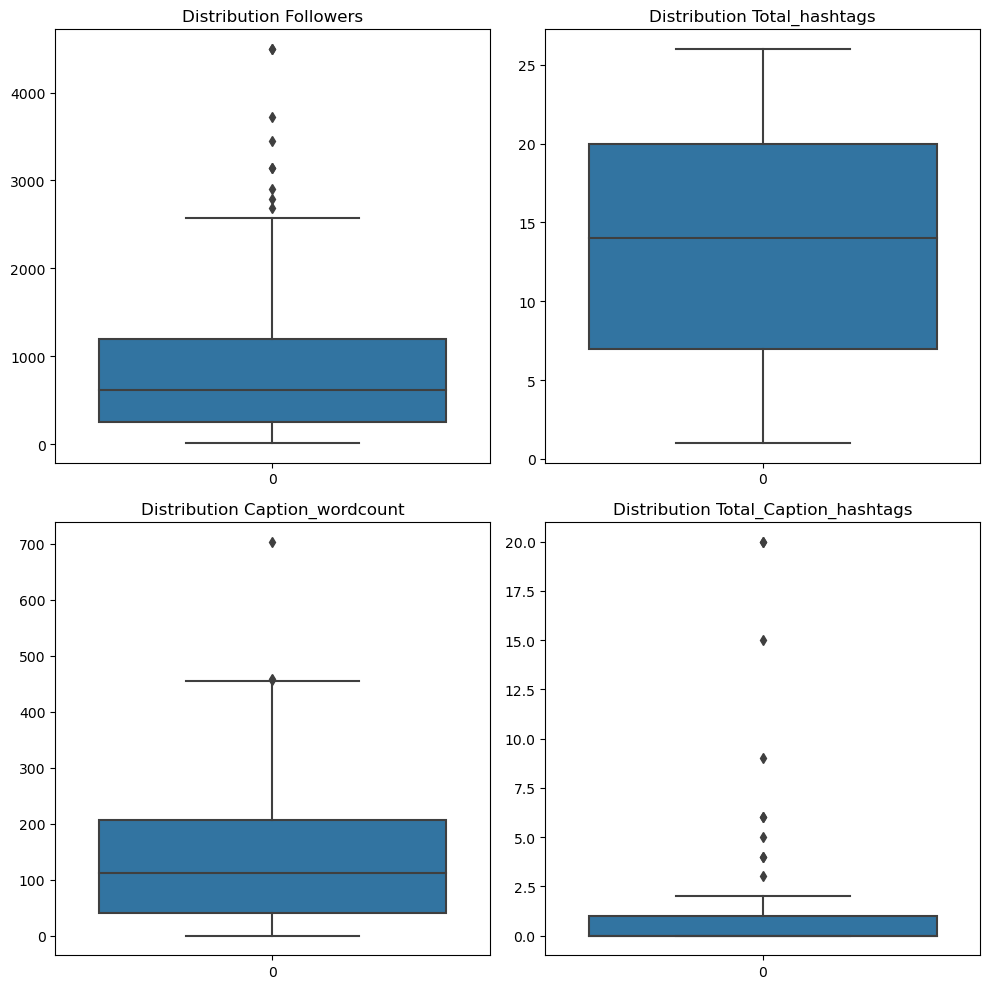

In [65]:
#df.boxplot(column="Followers")

#figure =  df.boxplot(column="Followers")
fig,axes = plt.subplots(2,2,figsize=(10, 10))
for i, feature in enumerate(independent_features):
    print(feature)
    sns.boxplot(data=data[feature],ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Distribution {feature}')

plt.tight_layout()
plt.show()

# feature transformation

In [66]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [67]:
data.columns

Index(['Followers', 'Time since posted', 'Likes', 'Total_hashtags',
       'Caption_wordcount', 'Total_Caption_hashtags'],
      dtype='object')

## Followers

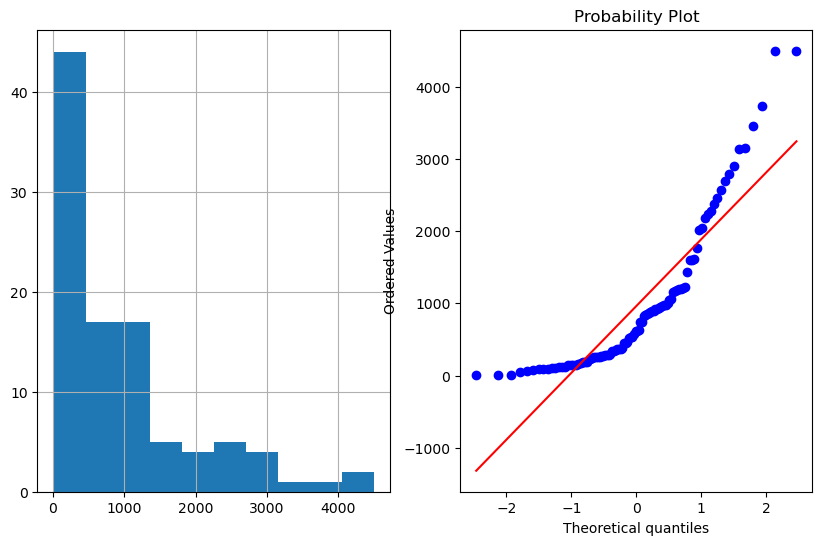

In [68]:
plot_data(data,'Followers')

In [69]:
data_1 = data.copy()

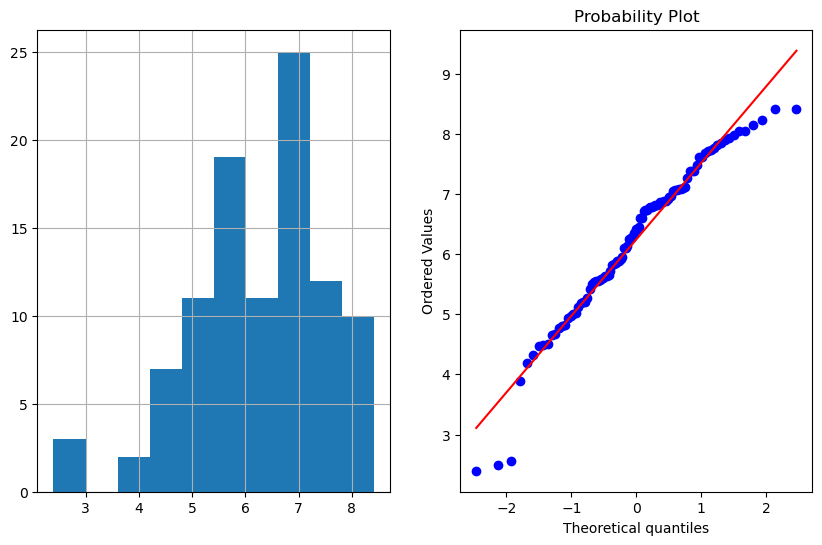

In [70]:
import numpy as np
data_1['Followers_log'] = np.log(data_1['Followers'])
plot_data(data_1,"Followers_log")

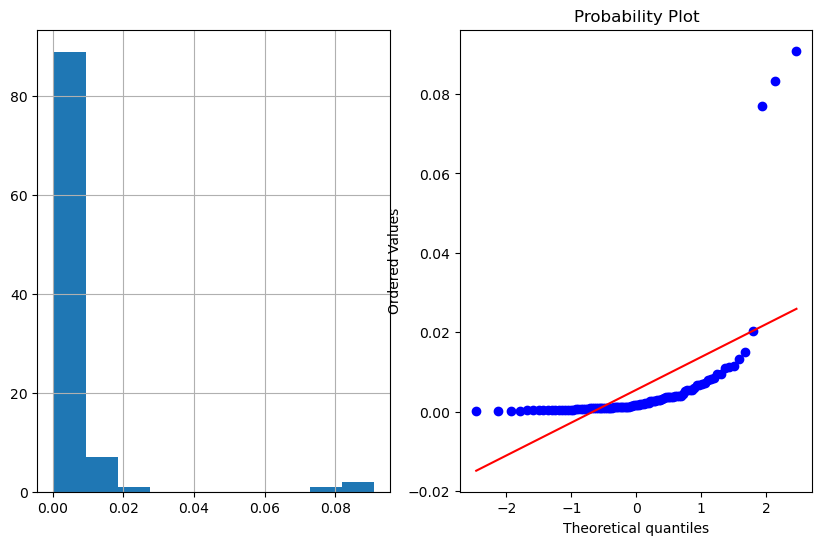

In [71]:
data_1['Followers_rec'] = 1/data_1['Followers']
plot_data(data_1,"Followers_rec")

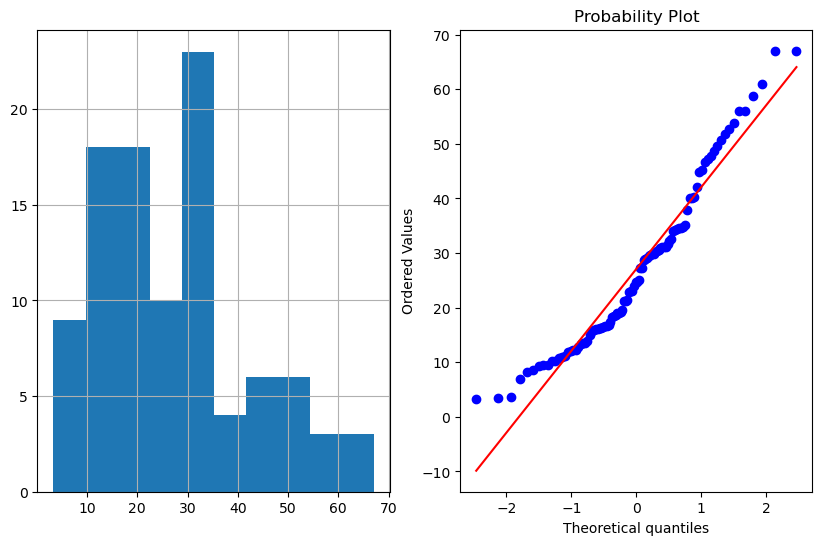

In [72]:
data['Followers_root'] = data.Followers**(1/2)
plot_data(data,"Followers_root")

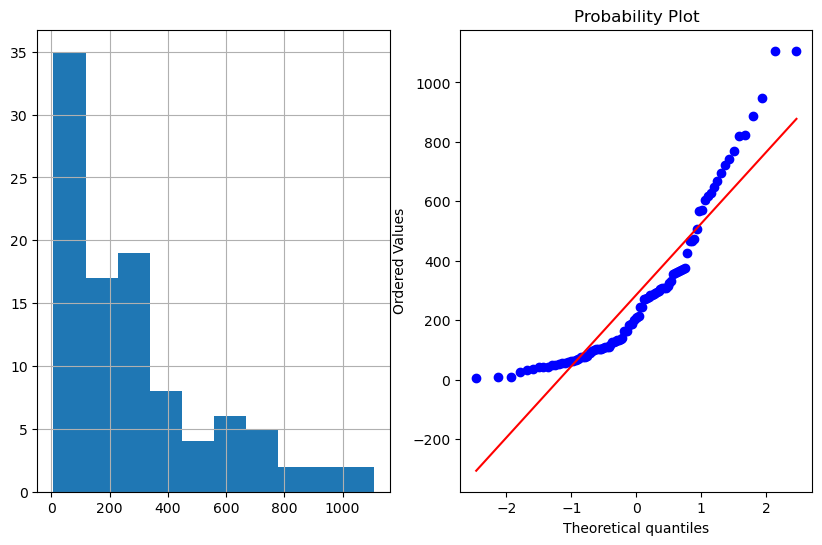

In [73]:
data_1['Followers_exp'] = data_1.Followers**(1/1.2)
plot_data(data_1,"Followers_exp")

In [74]:
data_1['Followers_Boxcox'], parameters = stat.boxcox(data_1['Followers'])
print(parameters)

0.1901539493609042


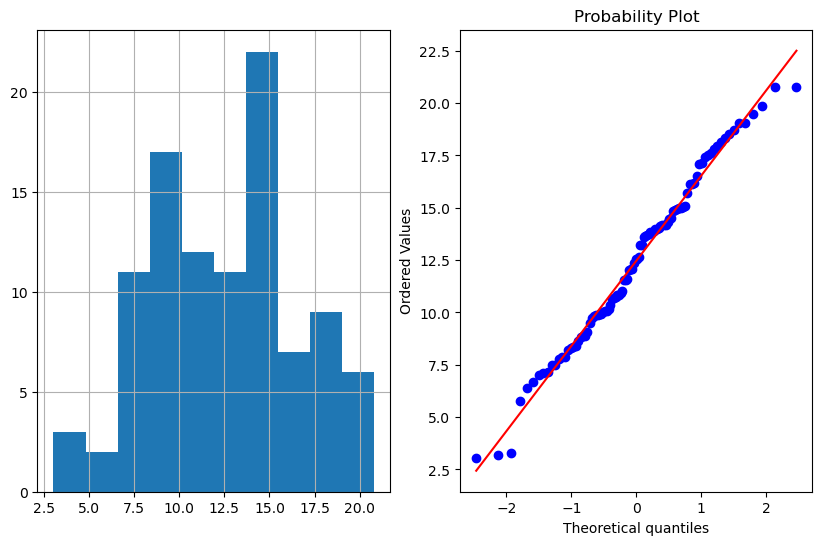

In [75]:
plot_data(data_1,'Followers_Boxcox')

## comment : BOXCOX performing much better

In [76]:
data['Followers']=data_1['Followers_Boxcox']

## Total_hashtags

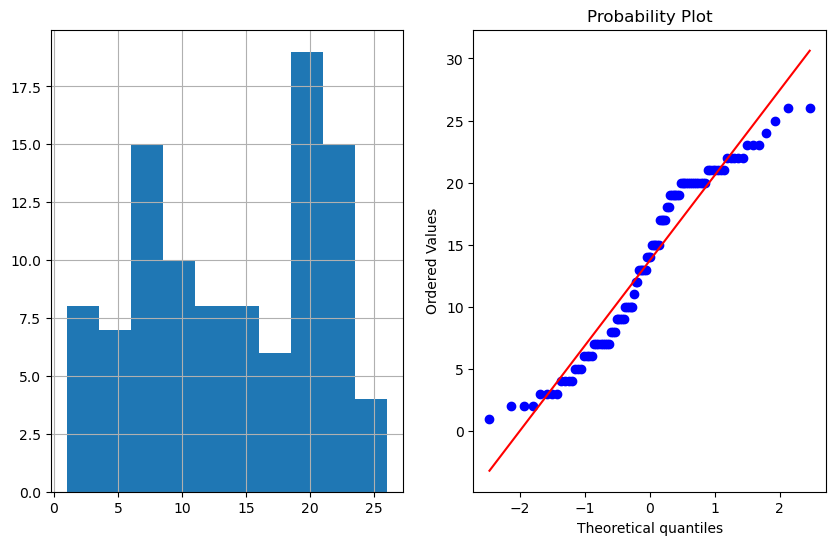

In [77]:
plot_data(data_1,"Total_hashtags")

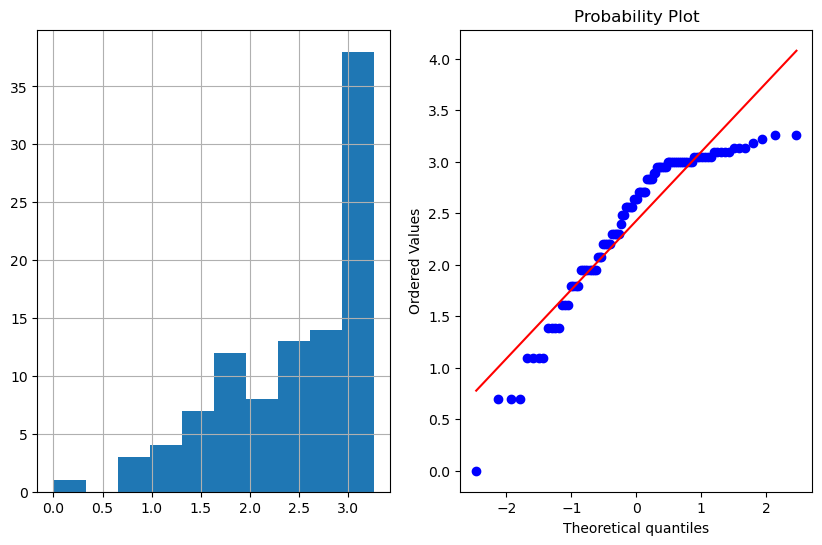

In [78]:
## log
data_1['Total_hashtags_log'] = np.log(data_1['Total_hashtags'])
plot_data(data_1,"Total_hashtags_log")

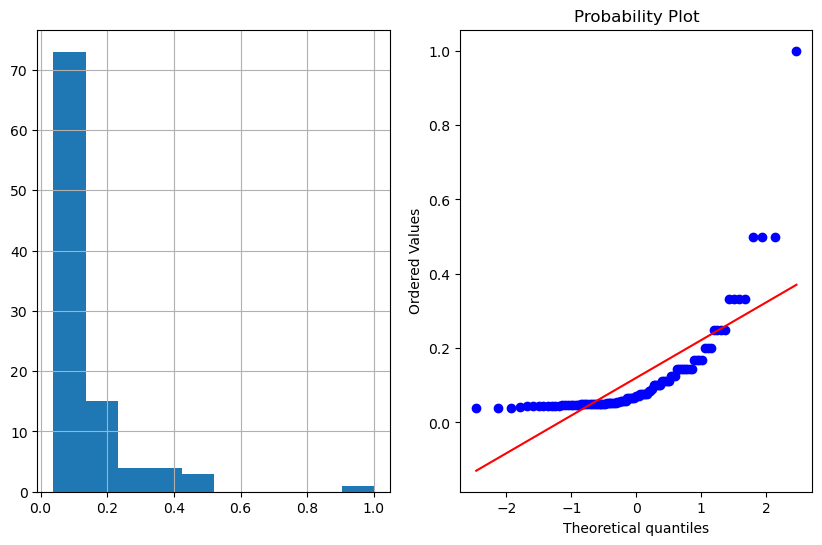

In [79]:
## log
data_1['Total_hashtags_recp'] = 1/data_1['Total_hashtags']
plot_data(data_1,"Total_hashtags_recp")

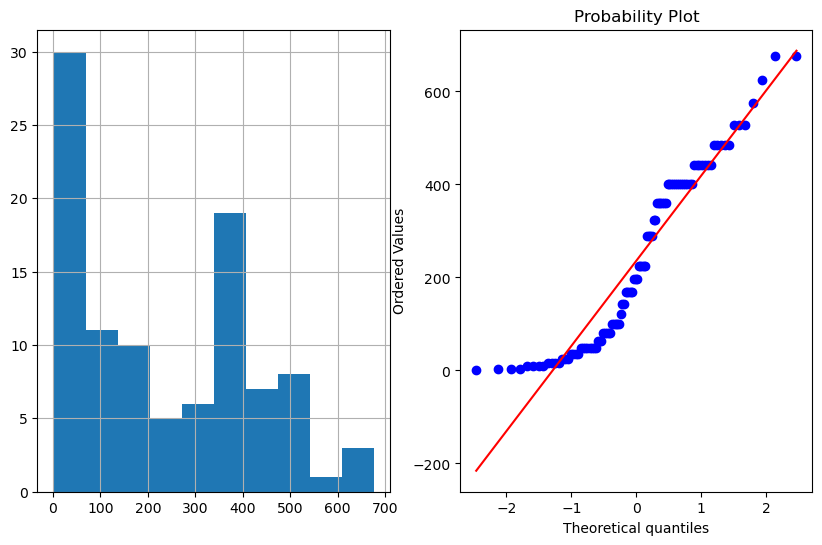

In [80]:
# square root
data_1['Total_hashtags_sqr'] = data_1['Total_hashtags']**2
plot_data(data_1,"Total_hashtags_sqr")

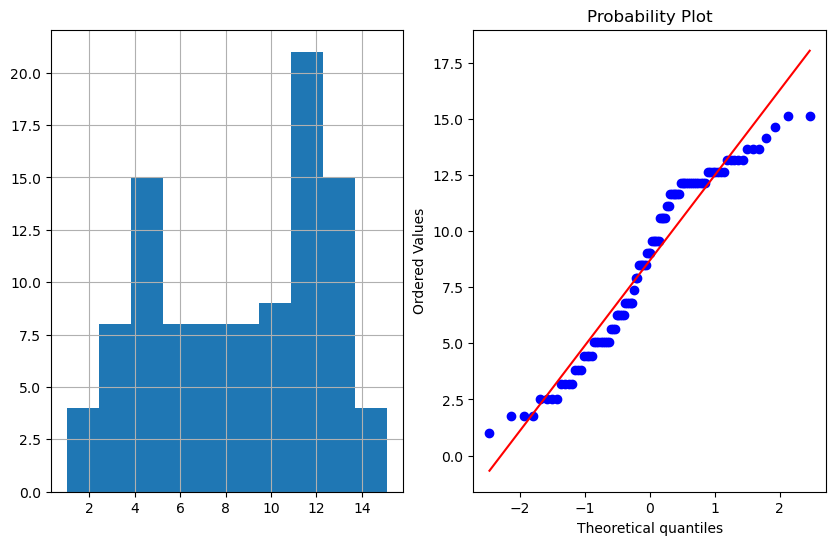

In [81]:
# exp
data_1['Total_hashtags_exp'] = data_1['Total_hashtags']**(1/1.2)
plot_data(data_1,"Total_hashtags_exp")

In [82]:

data_1['Total_hashtags_Boxcox'], parameters = stat.boxcox(data_1['Total_hashtags'])

print(parameters)

0.8128946428123197


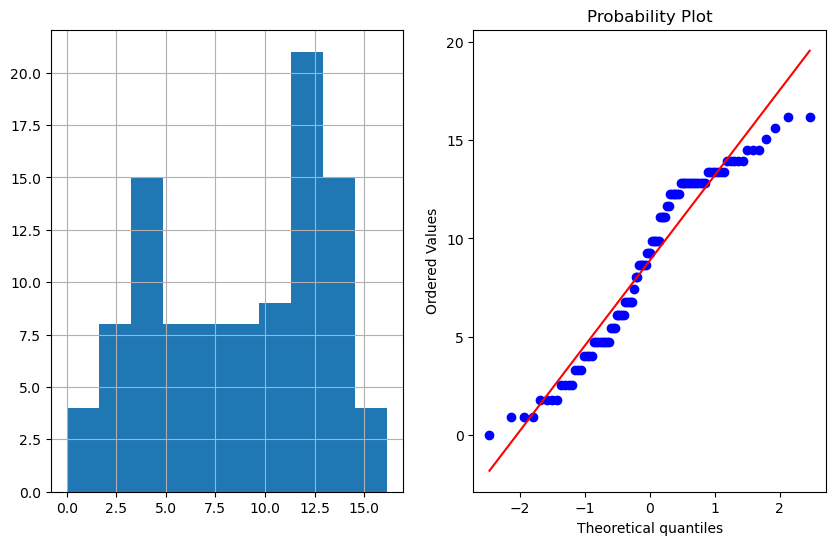

In [83]:
plot_data(data_1,'Total_hashtags_Boxcox')

In [84]:
## Comment : normally data seems much good as compared with the done transformations

## Caption_wordcount

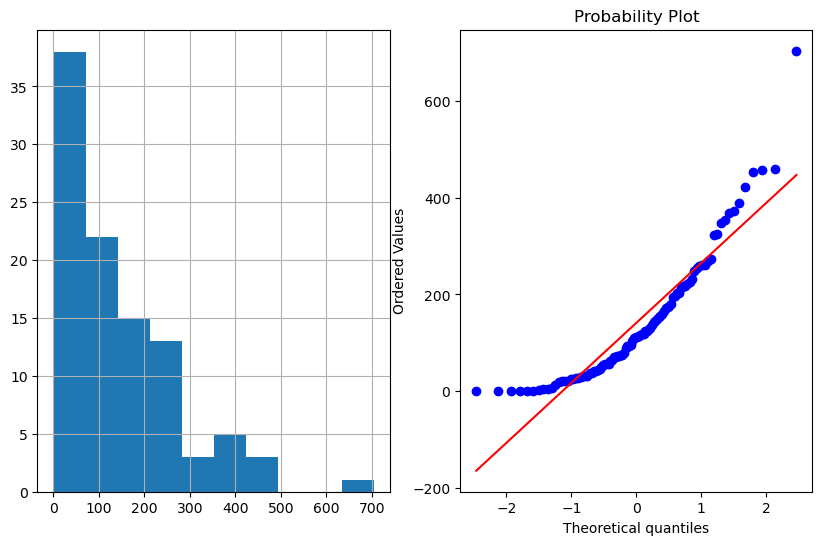

In [85]:
plot_data(data,"Caption_wordcount")

In [86]:
data_1["Caption_wordcount"].describe()

count    100.000000
mean     141.360000
std      131.185929
min        0.000000
25%       40.250000
50%      112.500000
75%      206.500000
max      704.000000
Name: Caption_wordcount, dtype: float64

### Log

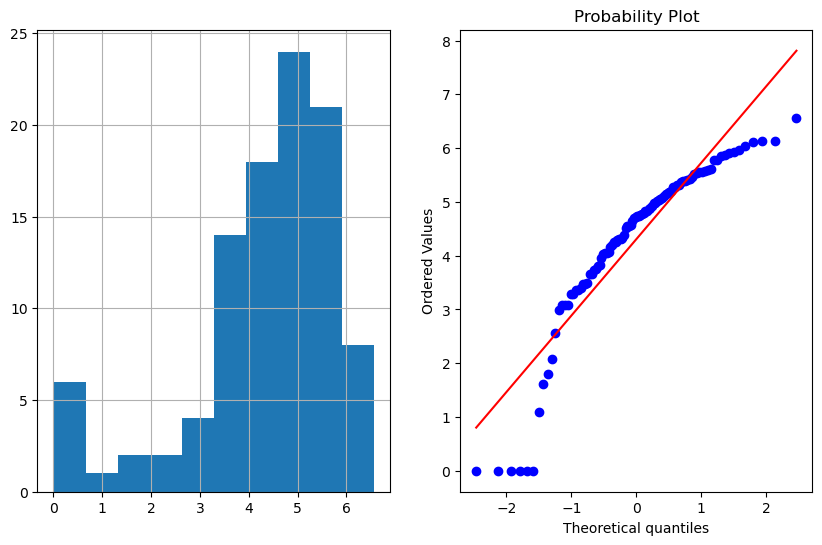

In [87]:
data_1["Caption_wordcount_add_1"] = data_1["Caption_wordcount"] +1 # handling zero in the data
data_1["Caption_wordcount_log"] = np.log(data_1["Caption_wordcount_add_1"])
plot_data(data_1,"Caption_wordcount_log")


## Square root

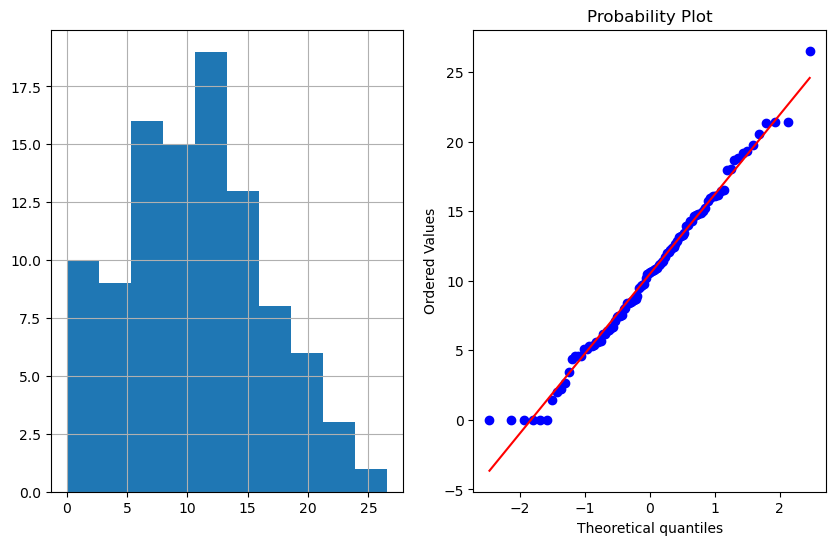

In [88]:
data_1["Caption_wordcount_root"] = data_1["Caption_wordcount"]**(1/2)
plot_data(data_1,"Caption_wordcount_root")

## reciprocal

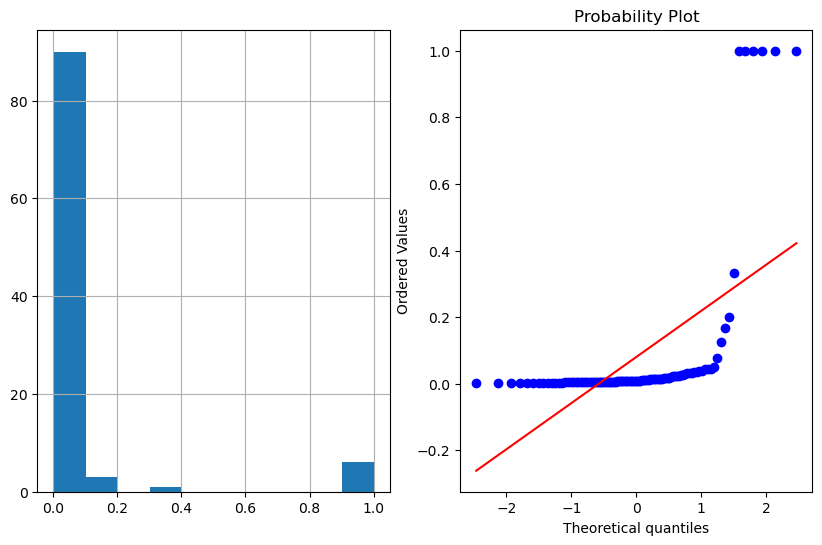

In [89]:
data_1["Caption_wordcount_rec"] = 1/data_1["Caption_wordcount_add_1"]
plot_data(data_1,"Caption_wordcount_rec")

## Exp

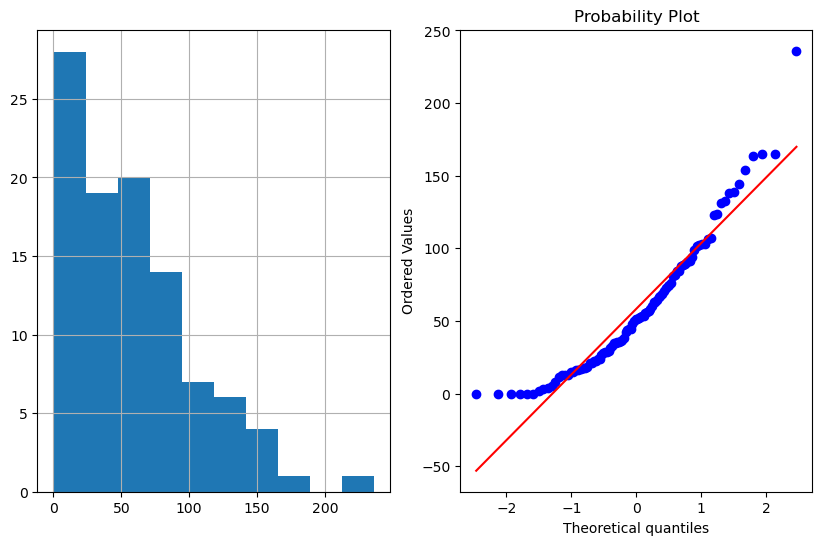

In [90]:
data_1["Caption_wordcount_exp"] = data_1["Caption_wordcount"]**(1/1.2)
plot_data(data_1,"Caption_wordcount_exp")

In [91]:
data_1['Caption_wordcount_Boxcox'], parameters = stat.boxcox(data_1['Caption_wordcount_add_1'])

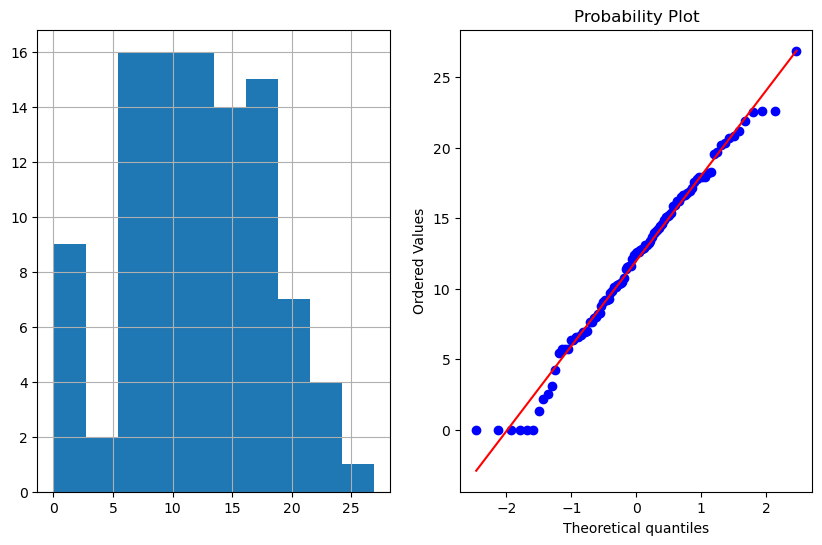

In [92]:
plot_data(data_1,'Caption_wordcount_Boxcox')

In [93]:
## Square root transformation working very well
data["Caption_wordcount"]=data_1["Caption_wordcount_root"]

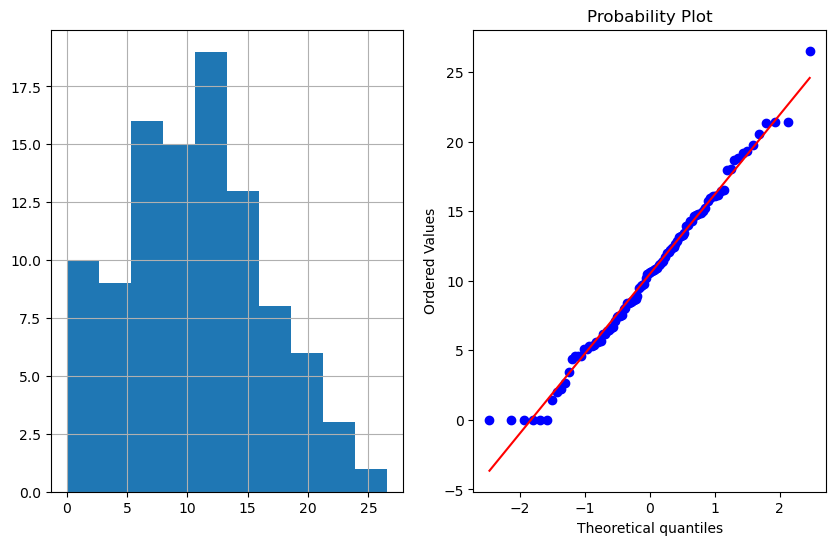

In [94]:
plot_data(data,"Caption_wordcount")

## 'Total_Caption_hashtags'

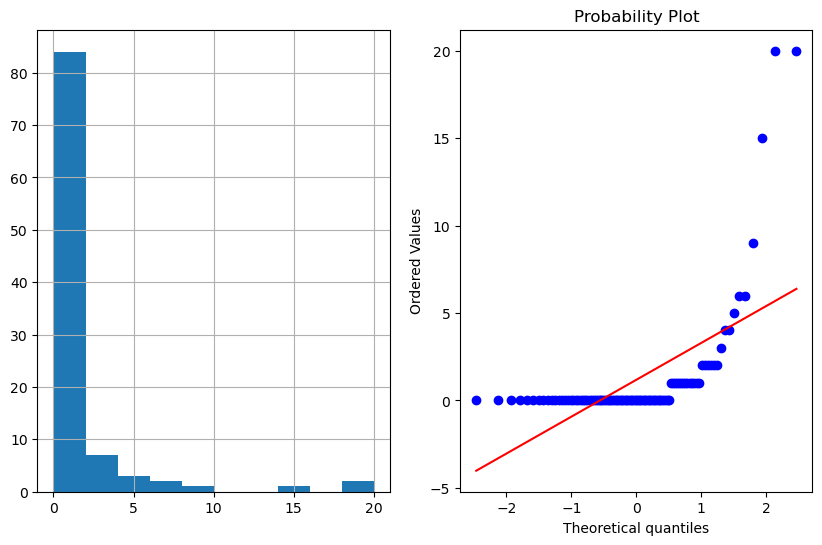

In [95]:
plot_data(data,'Total_Caption_hashtags')

In [96]:
len(data_1[data_1['Total_Caption_hashtags'] ==0])

70

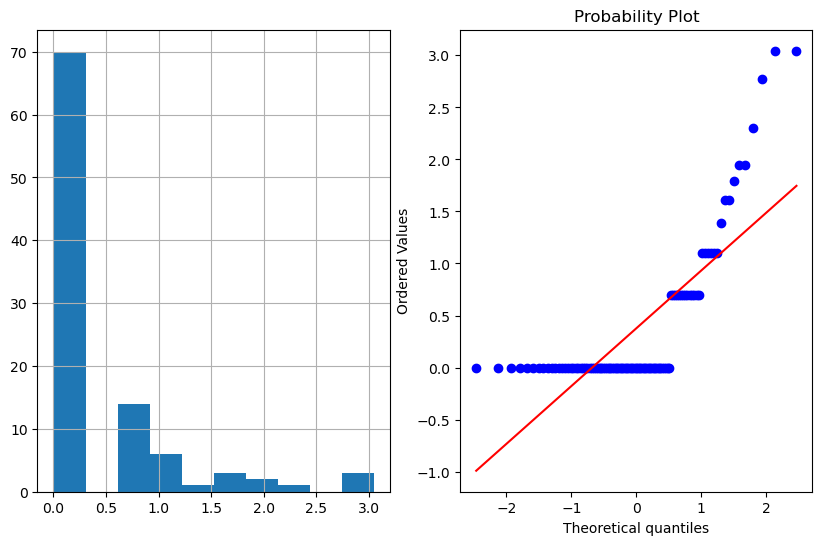

In [97]:
data_1['Total_Caption_hashtags_add'] = data_1['Total_Caption_hashtags'] +1
data_1['Total_Caption_hashtags_log'] = np.log(data_1['Total_Caption_hashtags_add'])
plot_data(data_1,'Total_Caption_hashtags_log')

# rec

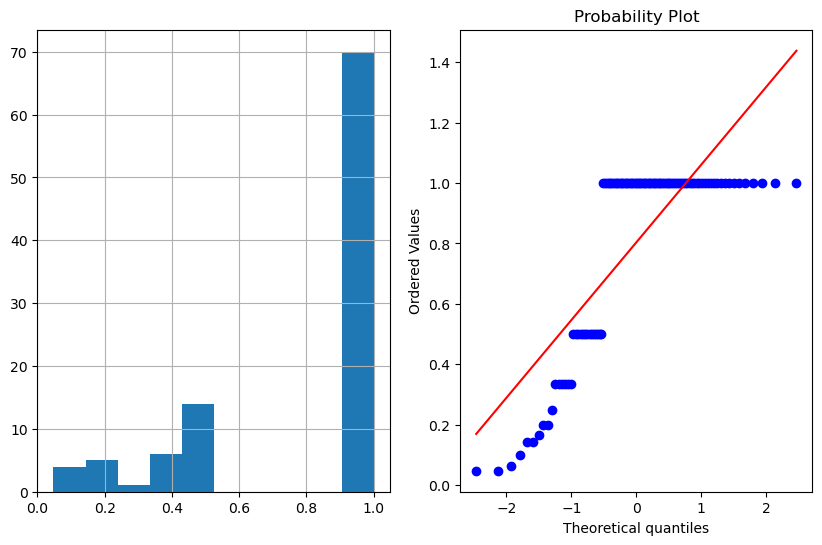

In [98]:
data_1['Total_Caption_hashtags_rec'] = 1/(data_1['Total_Caption_hashtags_add'])
plot_data(data_1,'Total_Caption_hashtags_rec')

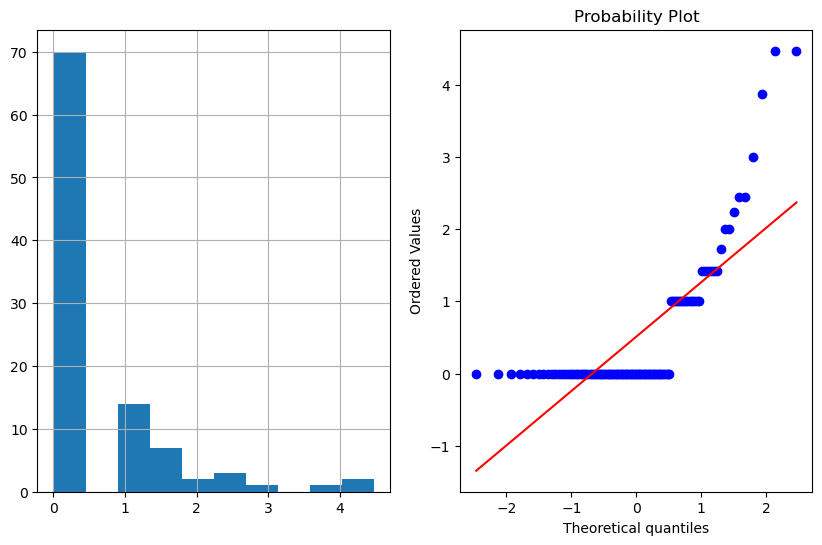

In [99]:
## sqaure root
data_1['Total_Caption_hashtags_root'] = data_1['Total_Caption_hashtags']**(1/2)
plot_data(data_1,'Total_Caption_hashtags_root')

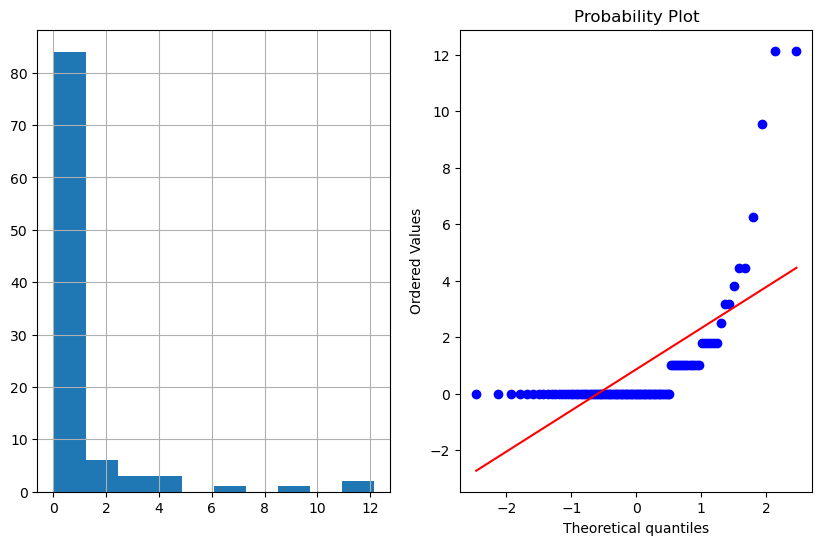

In [100]:
## sqaure root
data_1['Total_Caption_hashtags_exp'] = data_1['Total_Caption_hashtags']**(1/1.2)
plot_data(data_1,'Total_Caption_hashtags_exp')

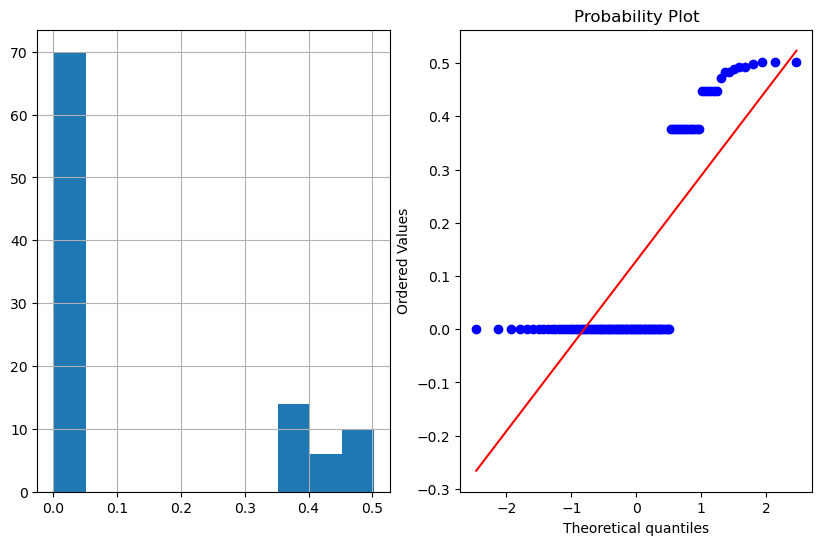

In [101]:

data_1['Total_Caption_hashtags_Boxcox'], parameters = stat.boxcox(data_1['Total_Caption_hashtags_add'])
plot_data(data_1,'Total_Caption_hashtags_Boxcox')

In [102]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [103]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [104]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

## preparing X and Y

In [105]:
X= data.drop(columns=['Likes','Time since posted'],axis=1)
y1 = df['Likes']
y2 = df['Time since posted']

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X,y1,y2,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y1_train.shape, y1_test.shape, y1_train.shape, y1_test.shape

((80, 5), (20, 5), (80,), (20,), (80,), (20,))

In [107]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [108]:
y_train = np.column_stack((y1_train, y2_train))
y_test = np.column_stack((y1_test, y2_test))

In [109]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
   
}
model_list = []
r2_list =[]
model_performance = dict()

for i in range(len(list(models))):
    model = list(models.values())[i]
    y_train = np.column_stack((y1_train, y2_train))
    y_test = np.column_stack((y1_test, y2_test))
    model.fit(X_train, y_train) # Train model
    


    # Make predictions
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    y1_train_pred, y2_train_pred =np.hsplit(y_train_pred, 2)
    y1_test_pred, y2_test_pred = np.hsplit( y_test_pred, 2)
    
    # Evaluate Train and Test dataset
    model_train_mae_y1 , model_train_rmse_y1, model_train_r2_y1 = evaluate_model(y1_train, y1_train_pred)
    model_train_mae_y2 , model_train_rmse_y2, model_train_r2_y2 = evaluate_model(y2_train, y2_train_pred)

    model_test_mae_y1 , model_test_rmse_y1, model_test_r2_y1 = evaluate_model(y1_test, y1_test_pred)
    model_test_mae_y2 , model_test_rmse_y2, model_test_r2_y2 = evaluate_model(y2_test, y2_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    model_performance[list(models.keys())[i]]= dict()
    
    print('Model performance for Training set y1')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_y1))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae_y1))
    print("- R2 Score: {:.4f}".format(model_train_r2_y1))
    
    print('Model performance for Training set y2')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_y2))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae_y2))
    print("- R2 Score: {:.4f}".format(model_train_r2_y2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_y1))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae_y1))
    print("- R2 Score: {:.4f}".format(model_test_r2_y1))
    
    print('Model performance for Test set y2')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_y2))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae_y2))
    print("- R2 Score: {:.4f}".format(model_test_r2_y2))
    #r2_list.append(model_test_r2)
    model_performance[list(models.keys())[i]]["y1"] = model_test_r2_y1
    model_performance[list(models.keys())[i]]["y2"] = model_test_r2_y2
    
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set y1
- Root Mean Squared Error: 54.9038
- Mean Absolute Error: 33.5440
- R2 Score: 0.1122
Model performance for Training set y2
- Root Mean Squared Error: 3.2227
- Mean Absolute Error: 1.6535
- R2 Score: 0.0788
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 36.1137
- Mean Absolute Error: 27.9117
- R2 Score: 0.0800
Model performance for Test set y2
- Root Mean Squared Error: 3.4148
- Mean Absolute Error: 2.2072
- R2 Score: -0.0012


Lasso
Model performance for Training set y1
- Root Mean Squared Error: 54.9294
- Mean Absolute Error: 33.2389
- R2 Score: 0.1114
Model performance for Training set y2
- Root Mean Squared Error: 3.2440
- Mean Absolute Error: 1.6648
- R2 Score: 0.0665
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 35.8015
- Mean Absolute Error: 27.1931
- R2 Score: 0.0958
Model performance for Test set y2
- Root Mean Squared Error: 3.347

In [110]:
model_performance

{'Linear Regression': {'y1': 0.08001371451598693, 'y2': -0.001160602199018257},
 'Lasso': {'y1': 0.0958499443416505, 'y2': 0.03819538546403822},
 'Ridge': {'y1': 0.08080426319510436, 'y2': -0.0009319330981873986},
 'K-Neighbors Regressor': {'y1': -0.24292876654833462,
  'y2': -0.23923588752951241},
 'Decision Tree': {'y1': -1.8897224411913562, 'y2': -0.1848036059240179},
 'Random Forest Regressor': {'y1': 0.23034349996737502,
  'y2': -0.02132818201330733},
 'XGBRegressor': {'y1': -0.9458535552573426, 'y2': 0.42507338927535543}}

In [172]:
# with all extra features and no transofmation
model_performance

{'Linear Regression': {'y1': -0.035929686053131515,
  'y2': -0.026615012053432308},
 'Lasso': {'y1': -0.02600494174382617, 'y2': 0.02200489262494343},
 'Ridge': {'y1': -0.03558102316419576, 'y2': -0.026541391748939658},
 'K-Neighbors Regressor': {'y1': 0.19451760070963642,
  'y2': 0.3411461687057309},
 'Decision Tree': {'y1': -1.9442148942511341, 'y2': -0.3951491736424122},
 'Random Forest Regressor': {'y1': 0.27701559119021046,
  'y2': 0.10940716892036928},
 'XGBRegressor': {'y1': -0.9406492022240396, 'y2': 0.4251026627622231}}

In [204]:
# with no extra features and no transofmation
model_performance

{'Linear Regression': {'y1': 0.16128913504989728, 'y2': 0.021029172852261024},
 'Lasso': {'y1': 0.16128188227722007, 'y2': 0.02100379734224722},
 'Ridge': {'y1': 0.1612891338438842, 'y2': 0.021029172600969037},
 'K-Neighbors Regressor': {'y1': 0.2418614904126789, 'y2': 0.3184803605924018},
 'Decision Tree': {'y1': 0.8695355444219304, 'y2': 0.12856836230950863},
 'Random Forest Regressor': {'y1': 0.6782043572545602,
  'y2': 0.6186755724881354},
 'XGBRegressor': {'y1': 0.8741099815238419, 'y2': 0.11810316421629108}}

In [230]:
## follower boxcox transformation
model_performance

{'Linear Regression': {'y1': 0.2512081973244059, 'y2': 0.030371213981425726},
 'Lasso': {'y1': 0.25042411960721, 'y2': 0.023843016614726542},
 'Ridge': {'y1': 0.25117020394836553, 'y2': 0.030370853876422244},
 'K-Neighbors Regressor': {'y1': 0.5351345822509792, 'y2': 0.3148744365743722},
 'Decision Tree': {'y1': 0.8720749985451044, 'y2': 0.11569006224511713},
 'Random Forest Regressor': {'y1': 0.7677423841280983,
  'y2': 0.5936938312942692},
 'XGBRegressor': {'y1': 0.8741099815238419, 'y2': 0.11810316421629108}}

In [394]:
## extra feature with transformation
model_performance

{'Linear Regression': {'y1': 0.08509833139156597,
  'y2': -0.0001735393697732679},
 'Lasso': {'y1': 0.09553765322085195, 'y2': 0.02707425505544292},
 'Ridge': {'y1': 0.08539862361855999, 'y2': -9.946963462303948e-05},
 'K-Neighbors Regressor': {'y1': -0.3358868955349692,
  'y2': -0.3911998282893323},
 'Decision Tree': {'y1': -0.6055345991806731, 'y2': -0.06460613865636389},
 'Random Forest Regressor': {'y1': 0.09820680326813647,
  'y2': -0.04200171710667511},
 'XGBRegressor': {'y1': -0.9458535552573426, 'y2': 0.42507338927535543}}

In [262]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,Total_hashtags,Caption_wordcount,Total_Caption_hashtags
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139,5.0,149.0,6.0
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23,19.0,454.0,20.0
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25,20.0,704.0,20.0
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49,20.0,4.0,0.0
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30,18.0,322.0,0.0
